## This is a sample Machine Learning project that exemplifies how to proceed Correspondence Analysis, Simple (SCA) and Multiple (MCA), using Python, Pandas, NumPy, SciPy, Statsmodels, Prince, Itertools, Scikit-learn, Matplotlib, Seaborn and Plotly, along with Anaconda managed environments

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
import statsmodels.api as sm
import prince
import os
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
if os.getenv("GITHUB_ACTIONS") == "true":
    pio.renderers.default = "png"
else:
    pio.renderers.default='colab'

- the formulas shown at this notebook have been taken from the following reference:

    FÁVERO, L. P.; BELFIORE, P. Manual de Análise de Dados: Estatística e Machine Learning com Excel®, SPSS®, Stata®, R® e Python®. 2ª edição, 1288 p. Brasil: ccGEN LTC, 2024.
    
    Available in Brazil at:
    
    https://www.amazon.com.br/Manual-An-C3-A1lise-Dados-Estat-C3-ADstica-Learning-dp-8595159920/dp/8595159920

## Use Case Scenario and Data - Investments' Categories per Client Profile and per Marital Status

This is an example of how to use Multiple Correspondence Analysis (MCA) to plot, into a perceptual map, the categories of more than 2 qualitative variables (that's why it's called multiple, and not simple), namely: Profile, Investment and Marital.Status. These 3 variables and their categories are displayed into multiple contingency tables, always comparing variables and their respective categories' frequencies, two by two. In MCA, the quantity of possible dimensions is calculated as m = J-Q, being J the total number of categories and Q the total number of variables. In our case, as we have 3 variables (with 3, 3 and 2 categories, respectively), that would give us a maximum of 8-3=5 dimensions we could choose to work with. The inertia (variance) of those dimensions is decrescent - dimensions, axes and lambda are synonyms here. Therefore, from all possible dimensions, we should keep, at the analysis, only those with an absolute lambda greater than the absolute average lambda. This average lambda is the total principal inertia divided by the total number of dimensions (or lambdas). The dimensions whose lambda values are inferior to that, should be discarded, as they won't have remaining inertia left to significantly contribute to the correspondence analysis. The inertia is the variance or quantity of data each dimension, or lambda, or axis, represents (contains). Most of the data is represented at the first 1, 2 or 3 dimensions (lambdas). We can thus discard the least representative ones, and plot the categories and observations only from the most significative dimensions, into a 2D or 3D, in most cases. If more than 3 dimensions should be considered at the analysis, we could only proceed with table analysis and not graphical analysis, as we can't represent more than 3 dimensions visually. We should proceed Chi square and Z Score hypothesis tests on the the pairs of variables and categories in order to decide if we should proceed with the anaysis and to discover which categories contribue most to the eventual association between their variables. As in MCA we have necessarily more than two variables, we should proceed these tests on all possible pairs (from all contingency tables), and keep the qualitative variables that associate with at least one other variable (not necessarily to all other ones). In other words, for a variable to be considered - and not discarded, that variable should be statistically associated to at least one of the other remaining variables. And, if a variable is associated to another variable, it means that at least some of their categories are associated as well. Discovering the associations is the aim of both Simple (only 2 variables) and Multiple (more than 2 variables) Correspondence Analysis. At the perceptual map, the associated categories will be visually closed (in distance).

Many of the concepts used at SCA are reused here, with MCA, so, if you want a thorough explanation of the Correspondence Analysis method, as a whole, first check out the SCA example below, which is identical to this one, except for the fact that this current example has been added a third variable (Marital.Status), while the other below has only the first 2 variables (Profile and Investment).

For SCA, see: <br>
[sample-ml-simple-correspondence-analysis-investments.ipynb](sample-ml-simple-correspondence-analysis-investments.ipynb)

In [2]:
# reading and displaying our dataset
client_financial_products = pd.read_excel("client-financial-products-marital.xlsx")
client_financial_products

,CLIENT,PROFILE,INVESTMENT,MARITAL.STATUS
0,Gabriela,Conservative,Savings,Married
1,Luiz Felipe,Conservative,Savings,Married
2,Patrícia,Conservative,Savings,Married
3,Gustavo,Conservative,Savings,Single
4,Letícia,Conservative,Savings,Married
...,...,...,...,...
95,Sheila,Aggressive,Stocks,Single
96,Pedro,Aggressive,Stocks,Single
97,Horácio,Aggressive,Stocks,Single
98,Leandro,Aggressive,Stocks,Single


In [3]:
client_financial_products["PROFILE"].value_counts()

PROFILE
Aggressive      58
Moderate        25
Conservative    17
Name: count, dtype: int64

In [4]:
client_financial_products["INVESTMENT"].value_counts()

INVESTMENT
Stocks     45
Bonds      40
Savings    15
Name: count, dtype: int64

In [5]:
client_financial_products["MARITAL.STATUS"].value_counts()

MARITAL.STATUS
Single     57
Married    43
Name: count, dtype: int64

In [6]:
# We have 3 variables, and we should create the contingency tables for each pair of variables, ignoring redundancies, so we should 
# have 3 contingency tables (PROFILE x INVESTMENT; PROFILE x MARITAL.STATUS and INVESTMENT x MARITAL.STATUS) and the crossing of
# all respective variables' categories

In [7]:
contingency_profile_investment_df = pd.crosstab(client_financial_products["PROFILE"], client_financial_products["INVESTMENT"], 
                             margins=True, margins_name="TOTAL").reindex(["Aggressive","Conservative","Moderate", "TOTAL"])[["Stocks","Bonds","Savings", "TOTAL"]]
contingency_profile_investment_df

INVESTMENT,Stocks,Bonds,Savings,TOTAL
PROFILE,,,,
Aggressive,36,20,2,58
Conservative,5,4,8,17
Moderate,4,16,5,25
TOTAL,45,40,15,100


In [8]:
contingency_profile_marital_df = pd.crosstab(client_financial_products["PROFILE"], client_financial_products["MARITAL.STATUS"], 
                             margins=True, margins_name="TOTAL").reindex(["Aggressive","Conservative","Moderate", "TOTAL"])[["Married","Single", "TOTAL"]]
contingency_profile_marital_df

MARITAL.STATUS,Married,Single,TOTAL
PROFILE,,,
Aggressive,17,41,58
Conservative,12,5,17
Moderate,14,11,25
TOTAL,43,57,100


In [9]:
contingency_investment_marital_df = pd.crosstab(client_financial_products["INVESTMENT"], client_financial_products["MARITAL.STATUS"], 
                             margins=True, margins_name="TOTAL").reindex(["Stocks","Bonds","Savings", "TOTAL"])[["Married","Single", "TOTAL"]]
contingency_investment_marital_df

MARITAL.STATUS,Married,Single,TOTAL
INVESTMENT,,,
Stocks,9,36,45
Bonds,24,16,40
Savings,10,5,15
TOTAL,43,57,100


In [10]:
# We could calculate the expected frequencies and residuals manually, for later calculating the Chi square, for each pair of
# variables (for each contingency table), and check out any significant association, or we could do it through the api methods
# Degrees of freedom for each contingency table is the same as for SCA: (i-1)*(j-1) = (3-1)*(3-1)=4, in this case (PROFILE x INVESTMENT)
# (we've done both ways on the SCA ipynb, see link above). Here, we'll proceed using the apis, directly:

In [11]:
# calculating chi square, for the association PROFILE x INVESTMENT, using the libs
# we gotta drop the TOTAL edge margins before sending the contingency table to the functions below:
if("TOTAL" in contingency_profile_investment_df.columns):
    contingency_profile_investment_df.drop("TOTAL",axis=1,inplace=True)    
if("TOTAL" in contingency_profile_investment_df.index):
    contingency_profile_investment_df.drop("TOTAL",axis=0,inplace=True)
test_qui2_profile_investment = chi2_contingency(contingency_profile_investment_df)
print("Association: PROFILE x INVESTMENT")
print(f"Chi² statistic: {round(test_qui2_profile_investment[0], 2)}")
print(f"p-value: {round(test_qui2_profile_investment[1], 6):.6f}")
print(f"degrees of freedom: {test_qui2_profile_investment[2]}")

Association: PROFILE x INVESTMENT
Chi² statistic: 31.76
p-value: 0.000002
degrees of freedom: 4


In [12]:
# calculating chi square, for the association PROFILE x MARITAL STATUS, using the libs
# Degrees of freedom for each contingency table is the same as for SCA: (i-1)*(j-1) = (3-1)*(2-1)=2, in this case (PROFILE x MARITAL STATUS)
if("TOTAL" in contingency_profile_marital_df.columns):
    contingency_profile_marital_df.drop("TOTAL",axis=1,inplace=True)    
if("TOTAL" in contingency_profile_marital_df.index):
    contingency_profile_marital_df.drop("TOTAL",axis=0,inplace=True)
test_qui2_profile_marital = chi2_contingency(contingency_profile_marital_df)
print("Association: PROFILE x MARITAL STATUS")
print(f"Chi² statistic: {round(test_qui2_profile_marital[0], 2)}")
print(f"p-value: {round(test_qui2_profile_marital[1], 6):.6f}")
print(f"degrees of freedom: {test_qui2_profile_marital[2]}")

Association: PROFILE x MARITAL STATUS
Chi² statistic: 11.44
p-value: 0.003284
degrees of freedom: 2


In [13]:
# calculating chi square, for the association INVESTMENT x MARITAL STATUS, using the libs
# Degrees of freedom for each contingency table is the same as for SCA: (i-1)*(j-1) = (3-1)*(2-1)=2, in this case (INVESTMENT x MARITAL STATUS)
if("TOTAL" in contingency_investment_marital_df.columns):
    contingency_investment_marital_df.drop("TOTAL",axis=1,inplace=True)    
if("TOTAL" in contingency_investment_marital_df.index):
    contingency_investment_marital_df.drop("TOTAL",axis=0,inplace=True)
test_qui2_investment_marital = chi2_contingency(contingency_investment_marital_df)
print("Association: INVESTMENT x MARITAL STATUS")
print(f"Chi² statistic: {round(test_qui2_investment_marital[0], 2)}")
print(f"p-value: {round(test_qui2_investment_marital[1], 6):.6f}")
print(f"degrees of freedom: {test_qui2_investment_marital[2]}")

Association: INVESTMENT x MARITAL STATUS
Chi² statistic: 17.86
p-value: 0.000133
degrees of freedom: 2


In [14]:
# observe that, from the 3 tests above, considered an alfa significance level of 5%, and ddof equal to 4, 2 and 2 respectively, the critical values
# at chi2 distribution would be: 9.488, 5.991 and 5.991. The obtained chi2 statistics were: 31.76, 11.44 and 17.86. The p-values were: 0.000002,
# 0.003284 and 0.000133. Therefore, all statistics were greater than the respective critical values and all p-values were less than 0.05 (alfa).
# This proves ALL variables from this use-case are statistically associated with at least one other variable. There is no variable not associated 
# to any other. So we keep them all at the analysis below.

In [15]:
# instantiating the main Prince object for later extracting the main specific attributes, up until the perceptual map coordinates
# Here we pass the original dataframe of the database - not any contingency table, as in SCA - and only with the qualitative 
# variables, excluding the client names, which are only IDs, not variables with data being analysed
client_financial_products_without_client = client_financial_products.drop("CLIENT", axis=1)
mca = prince.MCA(n_components=3).fit(client_financial_products_without_client)

In [16]:
# checking out the total category number
mca.J_

8

In [17]:
# checking out the total variable number
mca.K_

3

In [18]:
# calculating the total possible dimensions (maximum number of dimensions)
max_dimension_number = mca.J_ - mca.K_
max_dimension_number

5

In [19]:
# creating and showing the binary table (for didatics purposes only)
# This table transforms the qualitative variables into binary variables, that is, it combinnes the variables with each of their 
# categories, showing them separately as columns. This binary table, or the Burt table below, and not the contingency tables above, 
# are the ones used to get all eigenvalues, eigenvectors, singular values, Mass' matrices and finally the categories' coordinates
binary_df = pd.get_dummies(client_financial_products_without_client, columns=client_financial_products_without_client.columns, dtype=float)
binary_df

,PROFILE_Aggressive,PROFILE_Conservative,PROFILE_Moderate,INVESTMENT_Bonds,INVESTMENT_Savings,INVESTMENT_Stocks,MARITAL.STATUS_Married,MARITAL.STATUS_Single
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
95,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
96,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
97,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
98,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [20]:
# creating and showing the burt table (for didatics purposes only)
# this table is calculated as the transpose of the binary table above multiplied by the binary table itself
# this table crosses the frequencies of all categories, and visually resembles more contingency tables than the binary table above
# Observe that the frequencies are greater than the 100 observations of our dataset, because they reflect the frequencies of 
# couples of categories, taken 2 by 2, and not of observations, taken 3 by 3. So, one same observation is counted multiple times 
# This Burt table can be used, instead of the binary above, to get all eigenvalues, eigenvectors, singular values, Mass' matrices 
# and finally the categories' coordinates
burt_df = np.matmul(np.transpose(binary_df), binary_df)
burt_df

,PROFILE_Aggressive,PROFILE_Conservative,PROFILE_Moderate,INVESTMENT_Bonds,INVESTMENT_Savings,INVESTMENT_Stocks,MARITAL.STATUS_Married,MARITAL.STATUS_Single
PROFILE_Aggressive,58.0,0.0,0.0,20.0,2.0,36.0,17.0,41.0
PROFILE_Conservative,0.0,17.0,0.0,4.0,8.0,5.0,12.0,5.0
PROFILE_Moderate,0.0,0.0,25.0,16.0,5.0,4.0,14.0,11.0
INVESTMENT_Bonds,20.0,4.0,16.0,40.0,0.0,0.0,24.0,16.0
INVESTMENT_Savings,2.0,8.0,5.0,0.0,15.0,0.0,10.0,5.0
INVESTMENT_Stocks,36.0,5.0,4.0,0.0,0.0,45.0,9.0,36.0
MARITAL.STATUS_Married,17.0,12.0,14.0,24.0,10.0,9.0,43.0,0.0
MARITAL.STATUS_Single,41.0,5.0,11.0,16.0,5.0,36.0,0.0,57.0


In [21]:
# total principal inertia (sum of all lambdas or eigenvalues) can be calculated in MCA as (J-K)/K, J: total categories, 
# K: total variables, therefore:
total_principal_inertia = (mca.J_-mca.K_)/mca.K_
total_principal_inertia

1.6666666666666667

In [22]:
# the total principal inertia can also be extracted from the mca object directly:
mca.total_inertia_

1.6666666666666634

In [23]:
# If we were to use ALL possible 5 dimensions, the eigenvalues and the total principal inertia would be got as below
# We'd have to recalculate another mca with all 5 lambdas as components, instead of the 3 we'll actually use later down below
# Extracting the absolute, relative and cumulative eigenvalues and total principal inertia for all possible dimensions
# Check out that the total principal inertia is the same as calculated above
mca_total = prince.MCA(n_components=max_dimension_number).fit(client_financial_products_without_client)
print(mca_total.eigenvalues_summary)
print("\ntotal principal inertia: "+mca_total.eigenvalues_summary["eigenvalue"].astype("float").sum().astype(str))

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.602        36.14%                     36.14%
1              0.436        26.16%                     62.30%
2              0.276        16.59%                     78.89%
3              0.180        10.79%                     89.68%
4              0.172        10.32%                    100.00%

total principal inertia: 1.666


In [24]:
# But, as we're considering only 3 dimensions, out of the 5, we display the same stats above, but only for these 3 dimensions
# Here we use the 3-component mca we had instantiated before, not the 5-component one
# Observe that the inertia here will be partial, as we're summing the eigenvalues only from the first 3 dimensions, not from the 5
# We still keep a cumulative inertia (or variance) corresponding to 79% of the original data
print(mca.eigenvalues_summary)
print("\npartial inertia: "+mca.eigenvalues_summary["eigenvalue"].astype("float").sum().astype(str))

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.602        36.14%                     36.14%
1              0.436        26.16%                     62.30%
2              0.276        16.59%                     78.89%

partial inertia: 1.314


In [25]:
# A reference we may use to select which dimensions to keep, from the maximum available, is to select all dimensions whose absolute
# eigenvalue (inertia) is greater than the average inertia, that is, the sum of all eigenvalues (total principal inertia) divided 
# by the max number of dimensions. From this criteria, we should only keep the first 2 lambdas (which are greater than 0.33), and 
# that would give us a 2D perceptual map at the end. As we wanna exemplify here a 3D perceptual map, with 3 dimensions, we'll keep 
# actually the first 3 lambdas. The number of lambdas or dimensions to consider actually is up to the data analyst (up until the 
# max possible). He's the one to decide how much variance he's up to throw away. Here, by selecting the 3 first variances (lambda), 
# we're throwing away 21% of data. If we considered only the first 2 lambdas, we'd throw away some more...
average_inertia = total_principal_inertia/max_dimension_number
average_inertia

0.33333333333333337

In [26]:
# For manually calculating the coordinates of each category at the perceptual map, we would have to calculate the A and W matrices,
# using either the binary or the burt tables, calculate the singular valules and Mass' matrices, calculate the eigenvalues and
# eigenvectors, and only then the coordinates, similar to what we did at the SCA example. Here, we'll use only the api for that,
# and get the coordinates directly... and then simply plot those on the graph.

In [27]:
# an important thing to emphasize is that we actually generate different perceptual maps when either using the binary table or the
# burt table to get the needed attributes that ultimately derivate into the coordinates, but the difference isn't on the distances
# between the categories, at the map, but only at the scales of those maps, being the distances relatively the same... and, 
# therefore, there's no difference for our analysis of categories' associations - we can use either of those tables (binary or 
# burt). If we use the burt table, we generate the coordinates called principal. If, otherwise, we use the binary table, we 
# generate the coordinates called standard. The standard coordinates are the "standard" coordinates considered when extracting the
# coordinates of the observations, hence, if we want to plot at the perceptual map the observations, we should always plot the
# categories using the standard coordinates from the binary table. If we do not want to plot the observations, then we may plot
# the categories by extracting the principal coordinates from the burt table. Both types of coordinates are shown below:

In [28]:
# extracting categories' coordinates
# principal coordinates calculated from the Burt table of frequencies
principal_coordinates = mca.column_coordinates(client_financial_products_without_client)
principal_coordinates.rename(columns={0: 'X', 1: 'Y', 2:'Z'}, inplace=False)

,X,Y,Z
PROFILE_Aggressive,-0.653069,-0.014732,-0.342998
PROFILE_Conservative,1.129970,1.483614,-0.481506
PROFILE_Moderate,0.746741,-0.974679,1.123180
INVESTMENT_Bonds,0.417184,-0.935143,-0.400813
INVESTMENT_Savings,1.381285,1.331169,0.894758
INVESTMENT_Stocks,-0.831258,0.387515,0.058025
MARITAL.STATUS_Married,0.843172,-0.131145,-0.540665
MARITAL.STATUS_Single,-0.636077,0.098934,0.407870


In [29]:
# extracting categories' coordinates
# standard coordinates calculated from the Binary table of frequencies
# standard coordinates can also be calculated deriving from the principal_coordinates as below:
standard_coordinates = principal_coordinates/np.sqrt(mca.eigenvalues_)
standard_coordinates.rename(columns={0: 'X', 1: 'Y', 2:'Z'}, inplace=False)

,X,Y,Z
PROFILE_Aggressive,-0.841494,-0.022312,-0.652328
PROFILE_Conservative,1.455992,2.246900,-0.915746
PROFILE_Moderate,0.962193,-1.476129,2.136108
INVESTMENT_Bonds,0.537550,-1.416253,-0.762281
INVESTMENT_Savings,1.779816,2.016026,1.701686
INVESTMENT_Stocks,-1.071095,0.586883,0.110355
MARITAL.STATUS_Married,1.086446,-0.198617,-1.028258
MARITAL.STATUS_Single,-0.819599,0.149834,0.775703


In [30]:
# extracting observations' coordinates (from the standard coordinates, from the Binary table of frequencies)
observation_coordinates = mca.row_coordinates(client_financial_products_without_client)
observation_coordinates.rename(columns={0: 'X', 1: 'Y', 2:'Z'}, inplace=False)

,X,Y,Z
0,1.440751,1.354770,-0.080773
1,1.440751,1.354770,-0.080773
2,1.440751,1.354770,-0.080773
3,0.805403,1.470920,0.520548
4,1.440751,1.354770,-0.080773
...,...,...,...
95,-0.910729,0.238135,0.077910
96,-0.910729,0.238135,0.077910
97,-0.910729,0.238135,0.077910
98,-0.910729,0.238135,0.077910


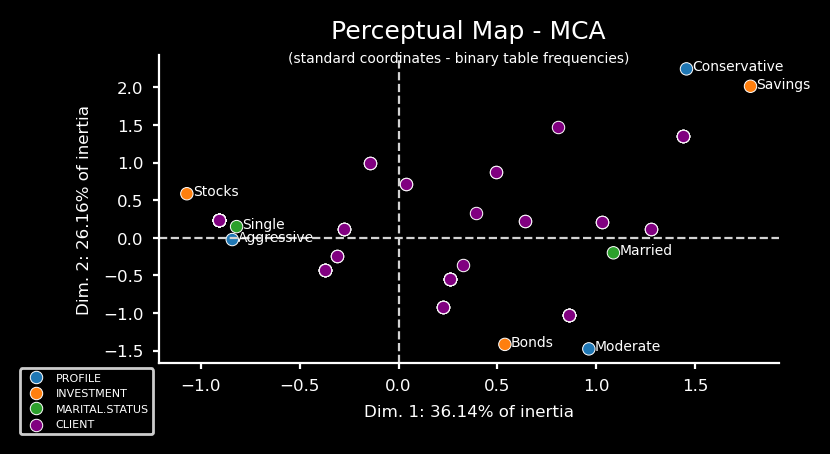

In [31]:
# creating and showing a 2D Perceptual Map (supposing we only wanted 2 dimensions or had considered only the first 2 lambdas)
# Here, we're using the standard coordinates (from the Binary table of frequencies), and therefore, we may also plot the
# observation_coordinates, derived, by default (at the api), from the standard coordinates, as well.

chart = standard_coordinates.reset_index()
var_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,0])
category_value_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,1])
chart_df_mca = pd.DataFrame({'variable_category': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'variable': var_chart,
                             'category': category_value_chart})

chart2 = observation_coordinates.reset_index()
chart_observation_df_mca = pd.DataFrame({'observation': chart2['index'],
                             'obs_x': chart2[0],
                             'obs_y': chart2[1]})

plt.figure(figsize=(4, 2), dpi=200)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.03, point['y'] - 0.02, point['val'], fontsize=5)

label_point(x = chart_df_mca['obs_x'],
            y = chart_df_mca['obs_y'],
            val = chart_df_mca['category'],
            ax = plt.gca())

sns.scatterplot(data=chart_df_mca, x='obs_x', y='obs_y', hue='variable', s=20, palette='tab10', alpha=1)
sns.scatterplot(data=chart_observation_df_mca, x='obs_x', y='obs_y', label="CLIENT", s=20, color="purple", alpha=1)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axhline(y=0, color='lightgrey', ls='--', linewidth=0.8)
plt.axvline(x=0, color='lightgrey', ls='--', linewidth=0.8)
plt.tick_params(size=2, labelsize=6)
plt.legend(bbox_to_anchor=(0,0), fancybox=True, shadow=True, fontsize = '4')
plt.title("Perceptual Map - MCA", fontsize=9)
plt.suptitle("(standard coordinates - binary table frequencies)", fontsize=5, y=0.89)
plt.xlabel(f"Dim. 1: {mca.eigenvalues_summary.iloc[0,1]} of inertia", fontsize=6)
plt.ylabel(f"Dim. 2: {mca.eigenvalues_summary.iloc[1,1]} of inertia", fontsize=6)
plt.show()


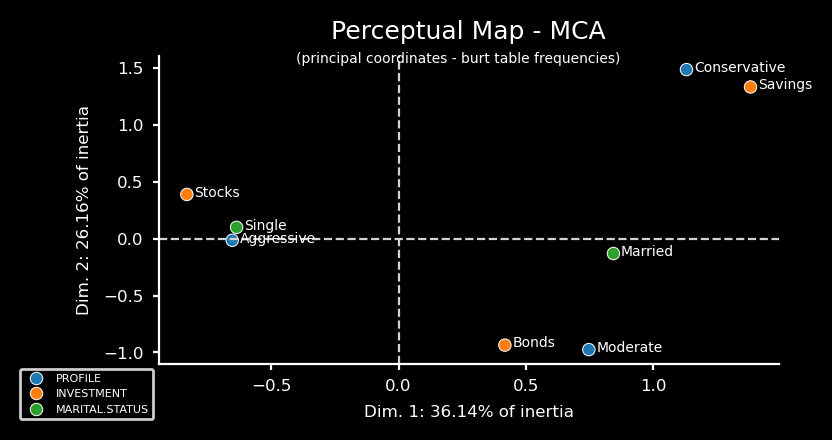

In [32]:
# creating and showing a 2D Perceptual Map (supposing we only wanted 2 dimensions or had considered only the first 2 lambdas)
# here, we're using the principal coordinates (from the Burt table of frequencies), only changes the coordinates df
# Observe that, compared to the Perceptual Map above, only the graph scale changes, but not the relative distances between the
# categories, therefore, either standard or principal coordinates - from the Binary or Burt tables of frequencies - can be used
# in order to reach the same result (which is the visual proximity between categories)
# Another detail is that the observation_coordinates that were calculated, by the api, from the standard coordinates, CANNOT be
# plotted here. We'd have to recalculate them from the principal coordinates instead.
# So here we plot only the categories... for proving that the relative distances between categories are kept the same (compared
# standard x principal coordinates).

chart = principal_coordinates.reset_index()
var_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,0])
category_value_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,1])
chart_df_mca = pd.DataFrame({'variable_category': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'variable': var_chart,
                             'category': category_value_chart})

plt.figure(figsize=(4, 2), dpi=200)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.03, point['y'] - 0.02, point['val'], fontsize=5)

label_point(x = chart_df_mca['obs_x'],
            y = chart_df_mca['obs_y'],
            val = chart_df_mca['category'],
            ax = plt.gca())

sns.scatterplot(data=chart_df_mca, x='obs_x', y='obs_y', hue='variable', s=20, palette='tab10', alpha=1)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axhline(y=0, color='lightgrey', ls='--', linewidth=0.8)
plt.axvline(x=0, color='lightgrey', ls='--', linewidth=0.8)
plt.tick_params(size=2, labelsize=6)
plt.legend(bbox_to_anchor=(0,0), fancybox=True, shadow=True, fontsize = '4')
plt.title("Perceptual Map - MCA", fontsize=9)
plt.suptitle("(principal coordinates - burt table frequencies)", fontsize=5, y=0.89)
plt.xlabel(f"Dim. 1: {mca.eigenvalues_summary.iloc[0,1]} of inertia", fontsize=6)
plt.ylabel(f"Dim. 2: {mca.eigenvalues_summary.iloc[1,1]} of inertia", fontsize=6)
plt.show()


In [33]:
# A basic interpretation of the results of our Perceptual Maps above is that Single clients clearly tend to have Agressive 
# (high-risk) investment profiles, that are, in turn, associated with Stocks, while Married ones tend to have a little more
# Moderate than Conservative profiles (definitely not Agressive), being the Moderate profile in turn associated with Bonds 
# while Conservative profile is associated with Savings.

In [34]:
# Creating and showing a 3D Perceptual Map (now with the 3 dimensions or lambdas we had already decided to use - from the max 5)
# Here, we're using the standard coordinates (from the Binary table of frequencies), and therefore, we may also plot the
# observation_coordinates, derived, by default (at the api), from the standard coordinates, as well.

# preparing the chart df for plotting data from
chart = standard_coordinates.reset_index()
var_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,0])
name_categ=[]
for col in client_financial_products_without_client:
    name_categ.append(client_financial_products_without_client[col].sort_values(ascending=True).unique())
    categories = pd.DataFrame(name_categ).stack().reset_index()
chart_df_mca = pd.DataFrame({'variable_category': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'obs_z': chart[2],
                             'variable': var_chart,
                             'category': categories[0]})

# preparing color mapping according to unique variables
unique_vars = chart_df_mca["variable"].unique()
color_map = {var: color for var, color in zip(unique_vars, px.colors.qualitative.Plotly)}
chart_df_mca['color'] = chart_df_mca['variable'].map(color_map)

# creating the Figure, adding each variable's trace with categories (1 color per trace or variable) and plotting the categories 
# from the chart above
fig = go.Figure()
for var in unique_vars:
    subset = chart_df_mca[chart_df_mca['variable'] == var]
    fig.add_trace(go.Scatter3d(
        x=subset["obs_x"],
        y=subset["obs_y"],
        z=subset["obs_z"],
        mode='markers+text',
        text=subset["category"],
        textposition='top center',
        textfont=dict(size=10),
        name=var,
        marker=dict(size=5, color=color_map[var])
    ))

# adding another trace for plotting observations from the observation_coordinates df
fig.add_trace(go.Scatter3d(
        x=observation_coordinates[0],
        y=observation_coordinates[1],
        z=observation_coordinates[2],
        mode='markers',
        # text="",
        # textposition='top center',
        # textfont=dict(size=10),
        name="CLIENTS",
        marker=dict(size=2, color="purple")
    ))


# adjusting graph visual details
fig.update_layout(
    title={
        'text': "Perceptual Map - MCA<br><span style='font-size:12px'>(standard coordinates - binary table frequencies)",
        'x': 0.5,
        'xanchor': 'center',
        'font': dict(size=14),
        'pad': dict(t=0, b=0)
    },
    legend=dict(
        itemsizing='constant',
        font=dict(size=11),
    ),
    scene=dict(
        xaxis=dict(title=dict(text=f"Dim. 1: {mca.eigenvalues_summary.iloc[0,1]} of inertia",font=dict(size=10)),tickfont=dict(size=9)),
        yaxis=dict(title=dict(text=f"Dim. 2: {mca.eigenvalues_summary.iloc[1,1]} of inertia",font=dict(size=10)),tickfont=dict(size=9)),
        zaxis=dict(title=dict(text=f"Dim. 3: {mca.eigenvalues_summary.iloc[2,1]} of inertia",font=dict(size=10)),tickfont=dict(size=9))
    ),
    width=700,
    height=500,
    margin=dict(
        l=80,
        r=80,
        t=90,
        b=50
    )
)

fig.show()

In [35]:
chart_df_mca

,variable_category,obs_x,obs_y,obs_z,variable,category,color
0,PROFILE_Aggressive,-0.841494,-0.022312,-0.652328,PROFILE,Aggressive,#636EFA
1,PROFILE_Conservative,1.455992,2.246900,-0.915746,PROFILE,Conservative,#636EFA
2,PROFILE_Moderate,0.962193,-1.476129,2.136108,PROFILE,Moderate,#636EFA
3,INVESTMENT_Bonds,0.537550,-1.416253,-0.762281,INVESTMENT,Bonds,#EF553B
4,INVESTMENT_Savings,1.779816,2.016026,1.701686,INVESTMENT,Savings,#EF553B
5,INVESTMENT_Stocks,-1.071095,0.586883,0.110355,INVESTMENT,Stocks,#EF553B
6,MARITAL.STATUS_Married,1.086446,-0.198617,-1.028258,MARITAL.STATUS,Married,#00CC96
7,MARITAL.STATUS_Single,-0.819599,0.149834,0.775703,MARITAL.STATUS,Single,#00CC96
